In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import yfinance

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
ticker = "INFY.NS"

In [3]:
def get_stats_page_data(ticker):
    statistic_page = "https://in.finance.yahoo.com/quote/{0}/key-statistics?p={0}".format(ticker.upper())
    content = requests.get(statistic_page).content
    stats_page_dfs = pd.read_html(content)
    stats_page_dfs = pd.concat(stats_page_dfs)
    stats_page_dfs.columns = ['field_name','value']
    return stats_page_dfs.pivot(columns='field_name').fillna(method='bfill').iloc[0]

In [4]:
infy_stats = get_stats_page_data('INFY.NS')

In [3]:
def get_historical_stock_price(ticker,period='1d',interval='5m'):
    ticker = yfinance.Ticker(ticker)
    return ticker.history(period=period,interval=interval)

In [4]:
infy_history = get_historical_stock_price(ticker,period='1mo')

In [27]:
def get_profile_data(ticker):
    prof_query = "https://in.finance.yahoo.com/quote/{0}/profile?p={0}".format(ticker)
    soup = BeautifulSoup(requests.get(prof_query).content)
    profile_data = list(soup.find_all('div',class_="asset-profile-container")[0].findChildren('p')[1].stripped_strings)
    profile_data = dict(zip(data[::3],data[2::3]))
    return profile_data

In [28]:
profile_data = get_profile_data(ticker)

In [39]:
def get_financial_data(ticker, data_classes = 'all'):
    query = "https://in.finance.yahoo.com/quote/{0}/{1}?p={0}"
    mapper = {'income_statement':'financials','cash_flow':'cash-flow','balance_sheet':'balance-sheet'}
    data_classes = mapper.get(data_classes,', '.join(mapper.values()))
    def scrape_data(query):
        soup = BeautifulSoup(requests.get(query).text)
        temp = soup.find_all(id='Col1-1-Financials-Proxy')[0]
        temp = list(list(temp.children)[0].children)[2]
        temp = list(temp.childGenerator())[0]
        temp = list(temp.childGenerator())[0]
        temp = list(temp.childGenerator())
        header = list(temp[0].stripped_strings)
        temp = temp[1]
        temp = list(temp.stripped_strings)
        final_list = []
        val_list = []
        for ind in range(len(temp)):
            try:
                if temp[ind] == '-':
                    val_list.append(temp[ind])
                    continue
                val_list.append(float(temp[ind].replace(',','')))
            except:
                if val_list:
                    final_list.append(val_list + [np.NaN]*(len(header) - len(val_list)))
                val_list = [temp[ind]]
        return pd.DataFrame(final_list,columns=header)
    data_list = []
    for data_class in data_classes.split(', '):
        data_list.append(scrape_data(query.format(ticker,data_class)))
    return data_list

In [40]:
financials = get_financial_data(ticker)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WORK IN PROGRESS

TA Approach

In [5]:
from tqdm import tqdm
tqdm.pandas()

C:\Users\ajayd\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [6]:
df = infy_history.copy()

In [7]:
df = df.drop(columns=['Dividends','Stock Splits'])

In [8]:
df.columns = df.columns.str.lower()

In [9]:
import numpy as np
import pandas as pd
from yahoo_financial_data_module import Ticker

ticker = Ticker('INFY.NS')
ticker_data = ticker.get_historical_stock_price()

def series_smoothener(series, smoothen_window = 14):
    init_smoothener = np.zeros(smoothen_window - 1)
    smoothen_series = np.zeros(len(series) - (smoothen_window - 1))
    smoothen_series[0] = series.dropna()[0 : smoothen_window].sum()
    indices = series.index.tolist()
    series = series.tolist()
    for i in range(1, len(smoothen_series) - 1):
        smoothen_series[i] = (smoothen_series[i - 1] - (smoothen_series[i - 1] / float(smoothen_window)) + series[smoothen_window + i])
    return smoothen_series

def ADX_indicator(df, smoothen_period = 14):
    diff_directional_index = (pd.DataFrame([df['close'].shift(1),df['high']]).max(axis=0,skipna=False) - 
                            pd.DataFrame([df['close'].shift(1),df['low']]).min(axis=0,skipna=False))
    diff_directional_index = series_smoothener(diff_directional_index)
    
    diff_up = df['high'] - df['high'].shift(1)
    diff_down = df['low'].shift(1) - df['low']
    
    di_pos = series_smoothener(diff_up.where(np.logical_or(np.logical_and(diff_up > diff_down, diff_up > 0), diff_up.isnull()),0))
    di_neg = series_smoothener(diff_down.where(np.logical_or(np.logical_and(diff_down > diff_up, diff_down > 0), diff_down.isnull()),0))
    
    di_pos = 100 * di_pos/diff_directional_index
    di_neg = 100 * di_neg/diff_directional_index
    
    DX = 100 * pd.Series((di_pos - di_neg) / (di_pos + di_neg)).abs()
    
    ADX = np.zeros(len(diff_directional_index))
    
    ADX[smoothen_period] = DX[0 : smoothen_period].mean()

    for i in range(smoothen_period + 1, len(ADX)):
        ADX[i] = ((ADX[i - 1] * (smoothen_period - 1)) + DX[i - 1]) / float(smoothen_period)

    df['DI_positive'] = np.concatenate([np.zeros(smoothen_period - 1),di_pos])
    df['DI_negative'] = np.concatenate([np.zeros(smoothen_period - 1),di_neg])
    df['DX'] = np.concatenate([np.zeros(smoothen_period - 1),DX])
    df['ADX'] = np.concatenate([np.zeros(smoothen_period - 1),ADX])
    return df

In [10]:
df = ADX_indicator(df)

<ipython-input-9-889b47179cf9>:29: RuntimeWarning: invalid value encountered in true_divide
  di_pos = 100 * di_pos/diff_directional_index
<ipython-input-9-889b47179cf9>:30: RuntimeWarning: invalid value encountered in true_divide
  di_neg = 100 * di_neg/diff_directional_index


In [55]:
temp.describe().round(2)

count    1423.00
mean        0.01
std         8.93
min       -42.52
25%        -3.55
50%         0.00
75%         4.00
max        53.19
Name: DX, dtype: float64

In [73]:
dd = pd.concat([temp_df['DX'], temp_df['DX'].shift(1),~ temp.between(temp.mean() - temp.std(), temp.mean() + temp.std())],axis=1)

In [77]:
dd.columns = ['DX','shift','bet']

In [100]:
df.close.diff(1).abs().describe()

count    1424.000000
mean        1.136587
std         1.260404
min         0.000000
25%         0.300000
50%         0.750000
75%         1.550000
max        11.850000
Name: close, dtype: float64

In [110]:
temp = df.tail(100).reset_index(drop=True)

<IPython.core.display.Javascript object>

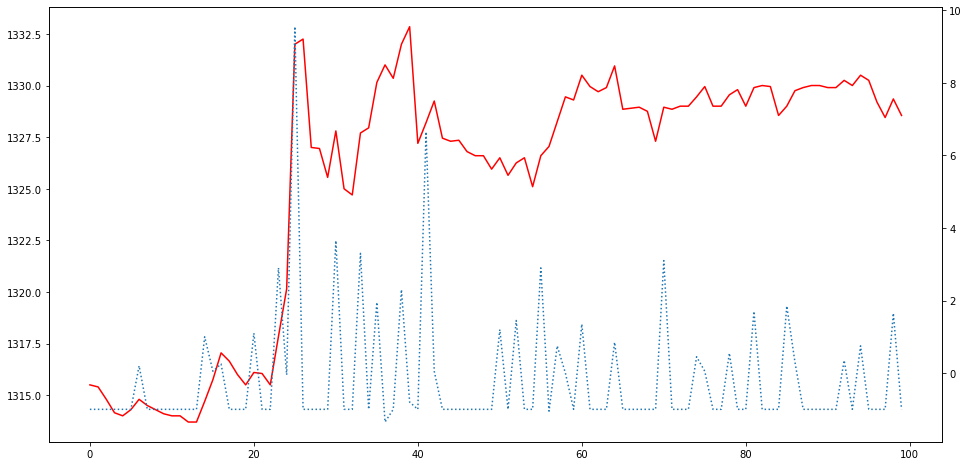

In [117]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(temp.close,color='red')
ax2 = ax1.twinx()
ax2.plot(np.where(temp.close.diff(1) > (0.3),temp.close.diff(1).diff(1),-1),linestyle='dotted')

AttributeError: 'DataFrame' object has no attribute 'between'

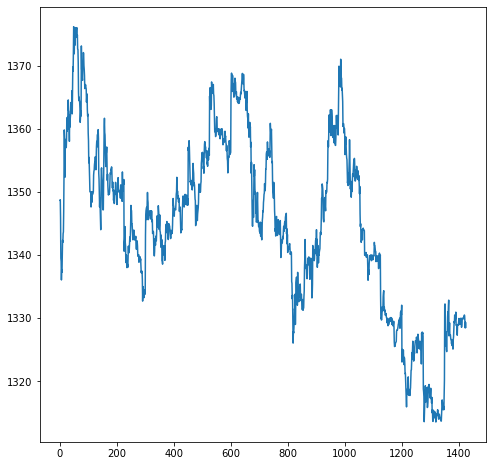

In [114]:
# df.reset_index()['DX'].diff(1).tail(100).plot(figsize=(8,8))
# df.reset_index()['DX'].tail(100).plot()
# plt.plot(df.reset_index().tail(100).index.tolist(), [df.reset_index()['DX'].tail(100).mean()]* 100)
df.reset_index().close.plot(figsize=(8,8))
temp.reset_index(drop=True).tail(100)[~ temp.reset_index(drop=True).tail(100).between(-trend,trend)].fillna(0).plot(kind='line',linestyle='dotted')
plt.show()

In [13]:
import mplfinance as mpf

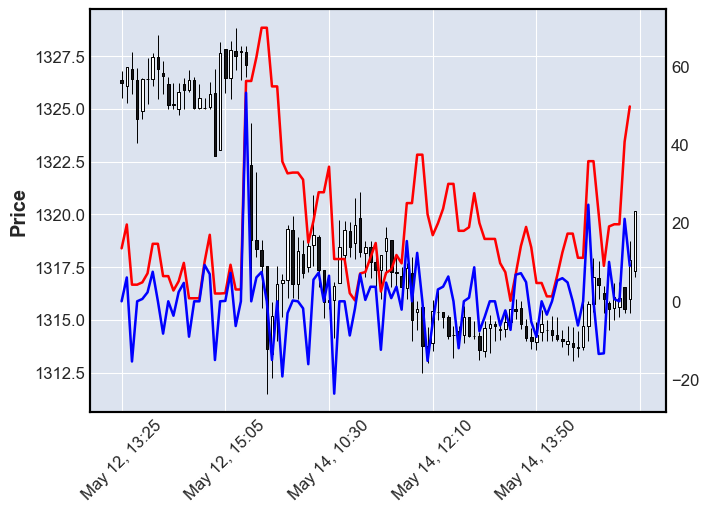

In [48]:
apdict2 = mpf.make_addplot(df['DX'].tail(100),type='line',color='r')
apdict1 = mpf.make_addplot(diff.tail(100),type='line',color='b')
mpf.plot(df[['open','high','low','close']].tail(100),type='candle',addplot=[apdict2,apdict1])

In [45]:
diff = df.DX - df.DX.shift(1)

In [51]:
diff[~ diff.between(-diff.mean(),diff.mean())]

Datetime
2021-04-15 09:15:00+05:30          NaN
2021-04-15 10:20:00+05:30    57.615894
2021-04-15 10:25:00+05:30    -7.494594
2021-04-15 10:35:00+05:30   -23.661190
2021-04-15 10:45:00+05:30     7.497474
                               ...    
2021-05-14 15:00:00+05:30    10.047096
2021-05-14 15:05:00+05:30     0.562229
2021-05-14 15:15:00+05:30    21.032831
2021-05-14 15:20:00+05:30     9.022324
2021-05-14 15:25:00+05:30          NaN
Name: DX, Length: 1173, dtype: float64

In [47]:
(diff - diff.shift(1)).describe()

count    1.497000e+03
mean     6.026937e-03
std      1.246839e+01
min     -6.511049e+01
25%     -6.595184e+00
50%      8.881784e-15
75%      6.922599e+00
max      5.761589e+01
Name: DX, dtype: float64